In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
data = pd.read_csv('student.csv')
data.shape
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [3]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

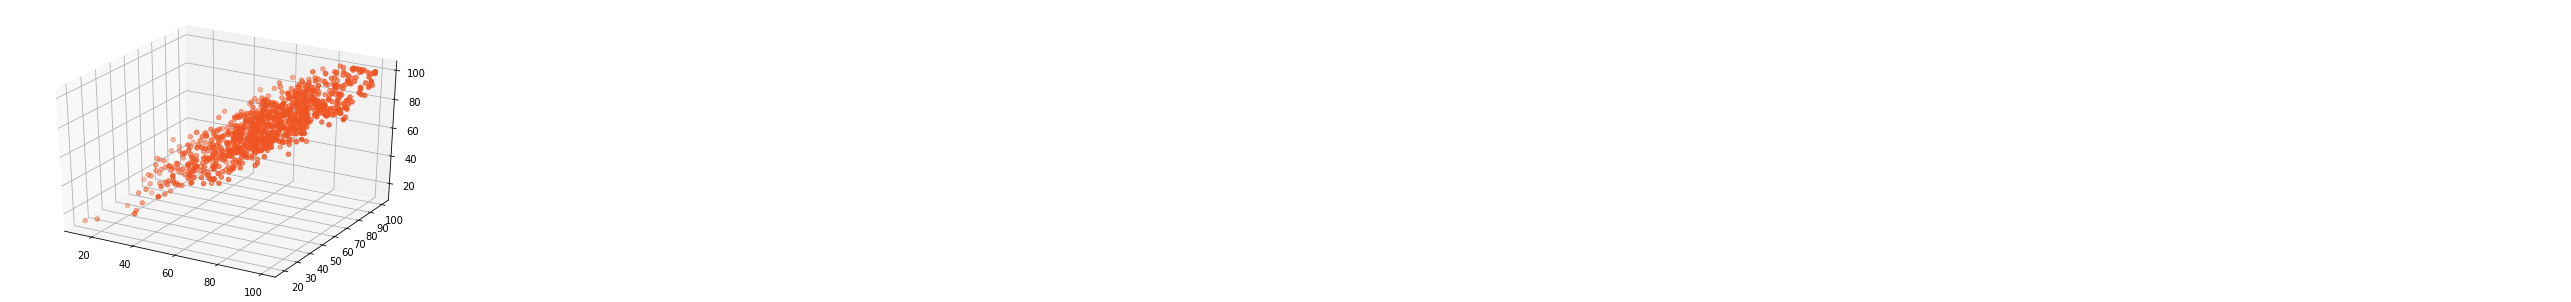

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef5423')
plt.show()

# Linear Regression Using Gradient Descent

In [5]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [6]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [7]:
cost_function(X, Y, B)

2470.11

In [8]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [9]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

In [10]:
newB

array([-0.47889172,  0.09137252,  0.90144884])

In [11]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [12]:
Y_pred = X.dot(newB)
rmse(Y, Y_pred)
r2_score(Y, Y_pred)

0.9097223273061553

# Linear Regression Using sklearn

In [13]:
from sklearn.linear_model import LinearRegression

X = np.array([math, read]).T
Y = np.array(write)

regressor = LinearRegression()
regressor.fit(X, Y)
regressor.coef_, regressor.intercept_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(array([0.09600221, 0.91049989]), -1.462437384941964)

In [14]:
Y_pred = regressor.predict(X)

In [15]:
rmse(Y, Y_pred)
r2_score(Y, Y_pred)

0.9098901726717316